In [10]:

%load_ext autoreload

%autoreload 2

In [1]:
import numpy as np
import torch
from torchvision import models
import torch.nn.functional as F
import torch.nn as nn

import sys
sys.path.append("./integrated_gradients")
from integrated_gradients.utils import calculate_outputs_and_gradients, generate_entrie_images
from integrated_gradients.integrated_gradients import random_baseline_integrated_gradients
from integrated_gradients.visualization import visualize

In [2]:
#hardware
device = 'cuda:0'

from circuit_pruner.utils import load_config

config = load_config('./configs/alexnet_sparse_config.py')
model = config.model.to(device)



#general
import os
from copy import deepcopy
from circuit_pruner.force import setup_net_for_circuit_prune, show_model_layer_names


show_model_layer_names(model)

/home/chris/miniconda3/envs/circuit_pruner/lib/python3.7/site-packages/torch/cuda/__init__.py:125: UserWarning: 
Tesla K40c with CUDA capability sm_35 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_61 sm_70 sm_75 compute_37.
If you want to use the Tesla K40c GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


All Layers:

features
features_0
features_1
features_2
features_3
features_4
features_5
features_6
features_7
features_8
features_9
features_10
features_11
features_12
avgpool
classifier
classifier_0
classifier_1
classifier_2
classifier_3
classifier_4
classifier_5
classifier_6

Convolutional and Linear layers:

('features_0', '  conv')
('features_3', '  conv')
('features_6', '  conv')
('features_8', '  conv')
('features_10', '  conv')
('classifier_1', '  linear')
('classifier_4', '  linear')
('classifier_6', '  linear')


['features',
 'features_0',
 'features_1',
 'features_2',
 'features_3',
 'features_4',
 'features_5',
 'features_6',
 'features_7',
 'features_8',
 'features_9',
 'features_10',
 'features_11',
 'features_12',
 'avgpool',
 'classifier',
 'classifier_0',
 'classifier_1',
 'classifier_2',
 'classifier_3',
 'classifier_4',
 'classifier_5',
 'classifier_6']

In [3]:
#feature target
layer = 'features_10'
unit = 241
#layer = 'features_0'
#unit = 0

feature_targets = {layer:[unit]}

In [4]:
import numpy as np
import torch
from torchvision import models
import cv2
from PIL import Image, ImageOps
import torch.nn.functional as F
from integrated_gradients.utils import calculate_outputs_and_gradients, generate_entrie_images
from integrated_gradients.integrated_gradients import random_baseline_integrated_gradients
from integrated_gradients.visualization import visualize

In [14]:
img = Image.open('./integrated_gradients/examples/01.jpg')
img.show()

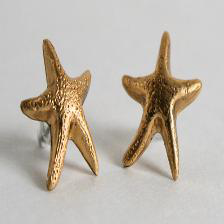

In [15]:
img

In [16]:
from PIL import Image, ImageOps

# read the image
img = Image.open('./integrated_gradients/examples/01.jpg')
img = np.array(img)

attributions = random_baseline_integrated_gradients(img, model, None,steps=50, 
                                                    num_random_trials=10, device=device)
img_integrated_gradient_overlay = visualize(attributions, img, clip_above_percentile=99, clip_below_percentile=0, \
                                                overlay=True, mask_mode=True)

the trial number is: 0
the trial number is: 1
the trial number is: 2
the trial number is: 3
the trial number is: 4
the trial number is: 5
the trial number is: 6
the trial number is: 7
the trial number is: 8
the trial number is: 9


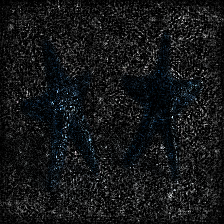

In [17]:
Image.fromarray(img_integrated_gradient_overlay.astype(np.uint8))

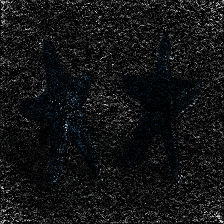

In [31]:
Image.fromarray(img_integrated_gradient_overlay.astype(np.uint8))

In [18]:
img_integrated_gradient_overlay.shape

(224, 224, 3)

In [9]:
img_integrated_gradient_overlay

array([[[ 0.        ,  0.        ,  0.        ],
        [ 1.520038  ,  1.520038  ,  1.520038  ],
        [ 0.88624454,  0.88624454,  0.88624454],
        ...,
        [ 4.3607016 ,  4.3607016 ,  4.3607016 ],
        [ 0.7542094 ,  0.7542094 ,  0.7542094 ],
        [ 5.634181  ,  5.634181  ,  5.634181  ]],

       [[ 0.7376133 ,  0.7376133 ,  0.7376133 ],
        [ 9.3462305 ,  9.3462305 ,  9.3462305 ],
        [15.315055  , 15.315055  , 15.315055  ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.87190944,  0.87190944,  0.87190944]],

       [[ 5.5222077 ,  5.5222077 ,  5.5222077 ],
        [ 0.8989226 ,  0.8989226 ,  0.8989226 ],
        [13.941535  , 13.941535  , 13.941535  ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 1.8603368 ,  1.8603368 ,  1.8603368 ],
        [ 0.77986383,  0.77986383,  0.77986383]],

       ...,

       [[ 3.1266708 ,  3.1266708 ,  3.1266708 ],
        [ 1

In [10]:
img_integrated_gradient_overlay.max()

255.0

In [11]:
img.max()

255

In [7]:
model = models.vgg19_bn(pretrained=True)

img = Image.open('./integrated_gradients/examples/01.jpg')
img = cv2.imread('./integrated_gradients/examples/01.jpg')
img = img.astype(np.float32) 
img = img[:, :, (2, 1, 0)]

NameError: name 'Image' is not defined

In [11]:
#device
devce = 'cuda:0'


#model
model = models.vgg19_bn(pretrained=True)
model.eval().to(device)

# read the image
img = cv2.imread('integrated_gradients/examples/01.jpg')
img = img.astype(np.float32) 
img = img[:, :, (2, 1, 0)]


# calculate the gradient and the label index
gradients, label_index = calculate_outputs_and_gradients([img], model, None, device)
gradients = np.transpose(gradients[0], (1, 2, 0))
img_gradient_overlay = visualize(gradients, img, clip_above_percentile=99, clip_below_percentile=0, overlay=True, mask_mode=True)
img_gradient = visualize(gradients, img, clip_above_percentile=99, clip_below_percentile=0, overlay=False)

# calculae the integrated gradients 
attributions = random_baseline_integrated_gradients(img, model, label_index, \
                                                    steps=50, num_random_trials=10, device=device)
img_integrated_gradient_overlay = visualize(attributions, img, clip_above_percentile=99, clip_below_percentile=0, \
                                            overlay=True, mask_mode=True)
img_integrated_gradient = visualize(attributions, img, clip_above_percentile=99, clip_below_percentile=0, overlay=False)
output_img = generate_entrie_images(img, img_gradient, img_gradient_overlay, img_integrated_gradient, \
                                    img_integrated_gradient_overlay)
#cv2.imwrite('integrated_gradients/results/' + 'vgg19' + '/' + '01_jpt.jpg', np.uint8(output_img))


the trial number is: 0
the trial number is: 1
the trial number is: 2
the trial number is: 3
the trial number is: 4
the trial number is: 5
the trial number is: 6
the trial number is: 7
the trial number is: 8
the trial number is: 9


In [39]:
cv2.imwrite('integrated_gradients/results/' + 'vgg19' + '/' + '01_jpt.jpg', np.uint8(output_img))

True

In [12]:
cv2.imwrite('integrated_gradients/results/' + 'vgg19' + '/' + '01_overlay_only.jpg', np.uint8(img_integrated_gradient_overlay))

True

## with feat viz

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import torch
from torchvision import models
import torch.nn.functional as F
import torch.nn as nn

import sys
sys.path.append("./integrated_gradients")
from integrated_gradients.utils import calculate_outputs_and_gradients, generate_entrie_images
from integrated_gradients.integrated_gradients import random_baseline_integrated_gradients
from integrated_gradients.visualization import visualize

import cv2
from PIL import Image, ImageOps


from circuit_pruner.dissected_Conv2d import dissect_model
from copy import deepcopy


In [3]:
#hardware
device = 'cuda:0'

from circuit_pruner.utils import load_config

config = load_config('./configs/alexnet_sparse_config.py')
model = config.model.to(device)

from lucent_video.modelzoo import inceptionv1, alexnet


dis_model = dissect_model(deepcopy(model))
_ = dis_model.to(device).eval()

/home/chris/miniconda3/envs/circuit_pruner/lib/python3.7/site-packages/torch/cuda/__init__.py:125: UserWarning: 
Tesla K40c with CUDA capability sm_35 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_61 sm_70 sm_75 compute_37.
If you want to use the Tesla K40c GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


In [25]:
import lucent_video
from lucent_video.modelzoo.util import get_model_layers
get_model_layers(model)

['conv2d0_pre_relu_conv',
 'conv2d1_pre_relu_conv',
 'conv2d2_pre_relu_conv',
 'mixed3a_1x1_pre_relu_conv',
 'mixed3a_3x3_bottleneck_pre_relu_conv',
 'mixed3a_5x5_bottleneck_pre_relu_conv',
 'mixed3a_pool_reduce_pre_relu_conv',
 'mixed3a_3x3_pre_relu_conv',
 'mixed3a_5x5_pre_relu_conv',
 'mixed3b_1x1_pre_relu_conv',
 'mixed3b_3x3_bottleneck_pre_relu_conv',
 'mixed3b_5x5_bottleneck_pre_relu_conv',
 'mixed3b_pool_reduce_pre_relu_conv',
 'mixed3b_3x3_pre_relu_conv',
 'mixed3b_5x5_pre_relu_conv',
 'mixed4a_1x1_pre_relu_conv',
 'mixed4a_3x3_bottleneck_pre_relu_conv',
 'mixed4a_5x5_bottleneck_pre_relu_conv',
 'mixed4a_pool_reduce_pre_relu_conv',
 'mixed4a_3x3_pre_relu_conv',
 'mixed4a_5x5_pre_relu_conv',
 'mixed4b_1x1_pre_relu_conv',
 'mixed4b_3x3_bottleneck_pre_relu_conv',
 'mixed4b_5x5_bottleneck_pre_relu_conv',
 'mixed4b_pool_reduce_pre_relu_conv',
 'mixed4b_3x3_pre_relu_conv',
 'mixed4b_5x5_pre_relu_conv',
 'mixed4c_1x1_pre_relu_conv',
 'mixed4c_3x3_bottleneck_pre_relu_conv',
 'mixed4c_5

100%|██████████| 512/512 [00:31<00:00, 16.28it/s]



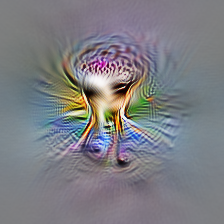

In [7]:
from lucent_fresh.optvis import render, param, transform, objectives
#from lucent.modelzoo import inceptionv1


param_f = lambda: param.image(224)
obj = objectives.neuron('features_10',241)


_ = render.render_vis(dis_model, obj, param_f, show_inline=True,save_image=True,image_name='integrated_gradients/examples/features_10_241.jpg')
                      
                      
                      
                      

In [9]:
#device
device = 'cuda:0'


#model
#config = load_config('./configs/alexnet_sparse_config.py')
#model = config.model.to(device)


feature_targets = {'features_10':[241]}
rank_field='max'

# read the image
img = cv2.imread('integrated_gradients/examples/features_10_241.jpg')
img = img.astype(np.float32) 
img = img[:, :, (2, 1, 0)]


# calculate the gradient and the label index
#gradients, label_index = calculate_outputs_and_gradients([img], model, None, device)
#gradients = np.transpose(gradients[0], (1, 2, 0))
#img_gradient_overlay = visualize(gradients, img, clip_above_percentile=99, clip_below_percentile=0, overlay=True, mask_mode=True)
#img_gradient = visualize(gradients, img, clip_above_percentile=99, clip_below_percentile=0, overlay=False)

# calculae the integrated gradients 
attributions = random_baseline_integrated_gradients(img, model, None, \
                                                    steps=50, num_random_trials=10, device=device,
                                                   feature_targets=feature_targets,rank_field=rank_field)
img_integrated_gradient_overlay = visualize(attributions, img, clip_above_percentile=99, clip_below_percentile=0, \
                                            overlay=True, mask_mode=True)
#img_integrated_gradient = visualize(attributions, img, clip_above_percentile=99, clip_below_percentile=0, overlay=False)
#output_img = generate_entrie_images(img, img_gradient, img_gradient_overlay, img_integrated_gradient, \
#                                    img_integrated_gradient_overlay)

features_10 effective last layer
the trial number is: 0
features_10 effective last layer
the trial number is: 1
features_10 effective last layer
the trial number is: 2
features_10 effective last layer
the trial number is: 3
features_10 effective last layer
the trial number is: 4
features_10 effective last layer
the trial number is: 5
features_10 effective last layer
the trial number is: 6
features_10 effective last layer
the trial number is: 7
features_10 effective last layer
the trial number is: 8
features_10 effective last layer
the trial number is: 9


In [10]:

cv2.imwrite('integrated_gradients/results/' + 'alexnet' + '/' + 'features_10_241.jpg', np.uint8(img_integrated_gradient_overlay))





True

In [17]:
img_integrated_gradient_overlay.shape

(224, 224, 3)

In [ ]:

kernels = get_model_conv_weights(model)

in_filterid = int(edge_name.split('-')[0])
out_filterid = int(edge_name.split('-')[1])

    in_layer,in_channel,in_layer_name=filterid_2_perlayerid(in_filterid,model)
    out_layer,out_channel,out_layer_name=filterid_2_perlayerid(out_filterid,model)

    kernel = kernels[out_layer][out_channel][in_channel].detach().cpu().numpy()
    if kernel is not None:
        kernel_layout = go.Layout(
            width=400,
            height=400,
            margin=dict(
                l=0,
                r=0,
                b=0,
                t=0,
                pad=0
            ))


        fig =  go.Figure(data=go.Heatmap(z = kernel,
                                        colorscale='RdBu',
                                        reversescale=True,
                                        zmid=0,
                                        #zmin=-.5,
                                        #zmax=.5,
                                        showscale=False),
                        layout=kernel_layout)
        fig.update_xaxes(visible=False)
        fig.update_yaxes(visible=False)
        fig.update(layout_showlegend=False)

        img_file_path = viz_folder+'/kernels/%s.jpg'%str(edge_name)
        if not os.path.exists(img_file_path):
            fig.write_image(img_file_path,format='jpg')

In [12]:
from circuit_pruner.utils import get_model_conv_weights
from circuit_pruner.visualizer.utils import color_channel_kernel_2_image

kernels = get_model_conv_weights(model)

kernel_image = color_channel_kernel_2_image(kernels[0][0])

# image_name = 'inputkernel_'+str(within_id)+'.jpg'
#             img_file_path = viz_folder + '/input_kernels_viz/'+image_name
#             kernel = circuit_kernels[0][within_id]
#             color_channel_kernel_2_image(kernel,save=img_file_path)
#             img = base64.b64encode(open(img_file_path, 'rb').read())

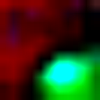

In [13]:
kernel_image

In [9]:
from circuit_pruner.utils import get_model_conv_weights

kernels = get_model_conv_weights(model)
kernels[0][0]

tensor([[[ 1.1221e-01,  8.6889e-02,  8.5510e-02,  9.2762e-02,  9.0219e-02,
           5.8642e-02,  4.4029e-02,  4.3039e-02,  4.7055e-02,  1.5116e-02,
           4.2424e-02],
         [ 7.0089e-02,  3.4749e-02,  4.5247e-02,  6.4691e-02,  6.0809e-02,
           6.1843e-02,  4.3919e-02,  2.0260e-02,  1.7695e-02, -3.9843e-03,
           6.3792e-04],
         [ 6.9729e-02,  3.4518e-02,  4.7156e-02,  4.6626e-02,  4.3347e-02,
           4.1362e-02,  3.9545e-02,  1.8170e-02,  3.3249e-02,  1.1431e-03,
           4.6734e-03],
         [ 6.3077e-02,  4.5430e-02,  5.3146e-02,  5.1074e-02,  4.7349e-02,
           2.8401e-02,  3.4554e-02,  2.7666e-02,  3.2619e-02, -1.6275e-03,
          -5.2874e-04],
         [ 7.7085e-02,  6.4775e-02,  5.9896e-02,  6.9718e-02,  7.8081e-02,
           5.0461e-02,  2.2697e-02,  1.2358e-02,  1.1609e-02, -8.2577e-03,
          -2.9385e-02],
         [ 8.3627e-02,  8.5198e-02,  8.4461e-02,  9.1421e-02,  5.6803e-02,
           2.2701e-02, -1.2930e-03, -3.0982e-02, -2.634